In [80]:
import numpy as np
import matplotlib.pyplot as plt
from non_relativistic_seperate import *
from z_d import *
from tqdm import tqdm
from scipy.optimize import root_scalar
import sys
from importlib import reload

### This Document is a sequal to the taylor expansion, but for z_d. It was specifically created to avoid the contradiction of the derivative of z_d and the kim and shaarpe approach

In [67]:
#plot cp_com for cutoff 7e3, alpha 1e-2 and q_2 from 0 to 10, 1000 points
q_2 = np.linspace(0.001,10,1000)
#y = np.vectorize(z_d)


d = np.array([1,1,0])
'''
z_d_results = np.array([ z_d(el, 1e3, 1e-1, d) for el in q_2])
'''

'\nz_d_results = np.array([ z_d(el, 1e3, 1e-1, d) for el in q_2])\n'

In [68]:
from zeta_speedy import z_d as z_d_speedy
k = 4
a = k-1.5
alpha = 10**(-a)
Xi = 10**k
z_d_results = z_d_speedy(q_2, Xi, alpha, d)

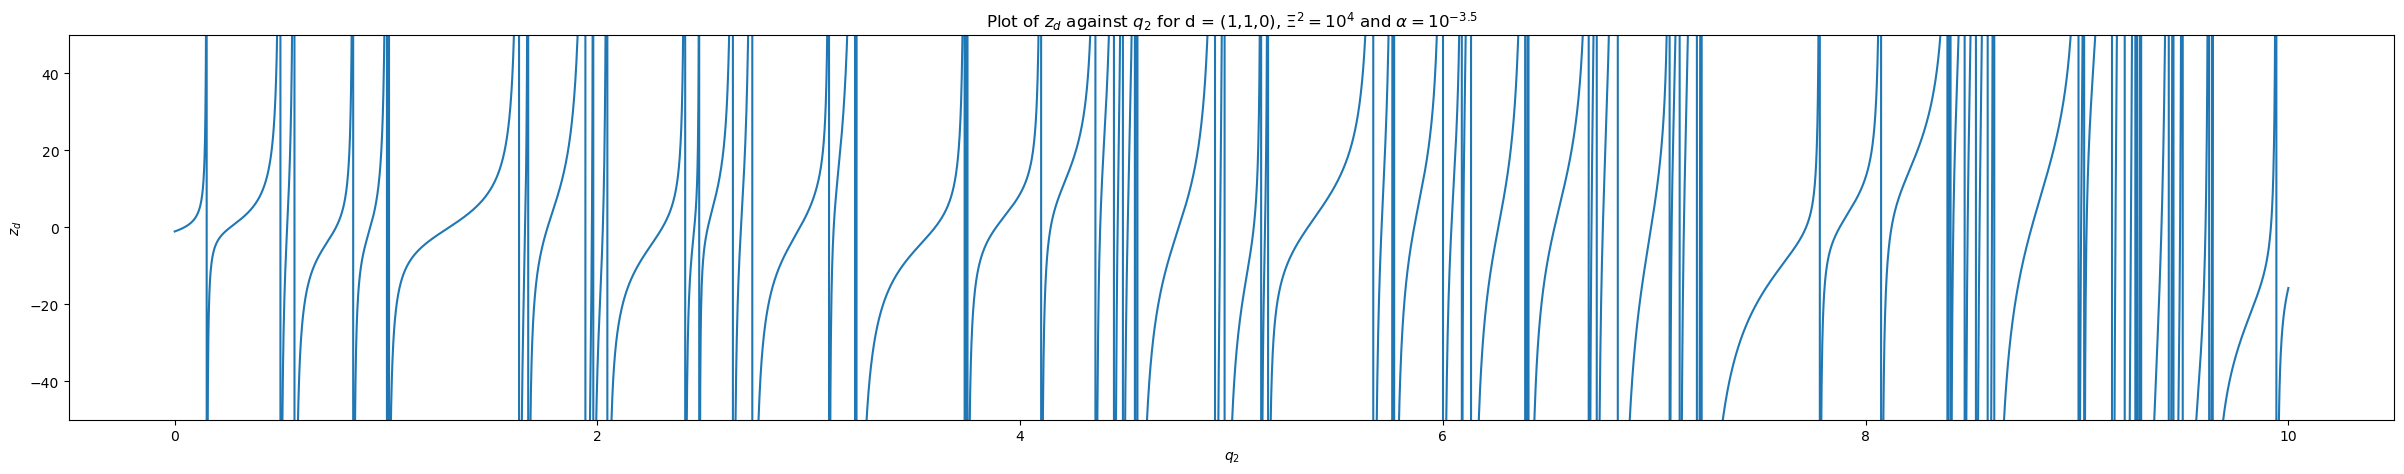

In [69]:
#plot the graph of z_d_results against q_2 in a range of 0 to 10
plt.figure(figsize=(30,5))
plt.plot(q_2, z_d_results)
plt.xlabel('$q_2$')
plt.ylabel('$z_d$')
plt.title('Plot of $z_d$ against $q_2$ for d = (1,1,0), $\Xi^2 = 10^4$ and $\\alpha = 10^{-3.5}$')
plt.ylim(-50,50)
plt.show()


In [70]:
root_temp = 0.26456378

### better to evaluate the coeffs ahead of time
s_max = 100
c_s = [zeta_derivative_d(root_temp,5e4 if s  ==1 else 1e3,s, d) for s in range(1,s_max)]


###Here I manuallyinsert c_s[0] as it converges slowly, I will try to find it using a different routine
#11.209738263414254
#c_s[0] = 11.2145#9738263414254
print(c_s)
taylor = lambda x: sum([c_s[s-1]*(x-root_temp)**s for s in range(1,s_max)])

taylor_a = lambda x,a: taylor(x)-a

[43.05143296950058, -66.86355094417411, 1600.8681792868163, -10536.64585241255, 109320.19299893842, -918781.9917748872, 8471584.760403937, -74855622.81246506, 674433434.9145191, -6021957381.0492935, 53995144395.90242, -483195200663.9335, 4328008834099.0234, -38749572111177.766, 347003276695335.0, -3107125555528834.5, 2.782297667945628e+16, -2.491375195015607e+17, 2.23089460273773e+18, -1.9976385033297154e+19, 1.7887750447606923e+20, -1.6017476315224468e+21, 1.434275808875427e+22, -1.2843138093329576e+23, 1.1500313526060332e+24, -1.0297888499156747e+25, 9.221184275779884e+25, -8.257055650166211e+26, 7.393732340986446e+27, -6.6206744991420155e+28, 5.928444371363313e+29, -5.308590936972056e+30, 4.753546795585661e+31, -4.256535755530017e+32, 3.811490118518813e+33, -3.4129765982211418e+34, 3.056129990625137e+35, -2.736593776939804e+36, 2.450466937919286e+37, -2.1942563285885047e+38, 1.964834032669117e+39, -1.7593991757639377e+40, 1.5754437312317416e+41, -1.410721901241934e+42, 1.26322269922

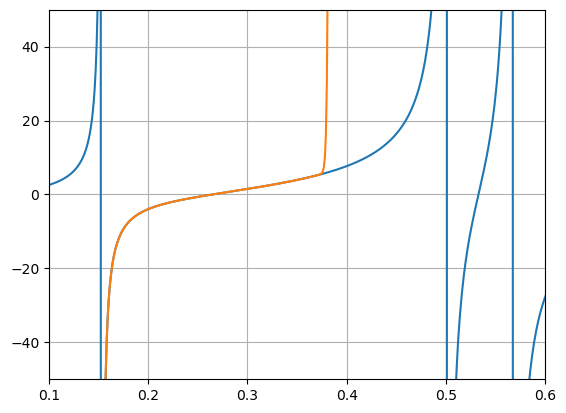

In [71]:
#plot taylor of x around the root_temp
x = np.linspace(0.001,1,1000)
plt.plot(q_2, z_d_results)
plt.plot(x, taylor(x))
plt.grid(True)
plt.ylim(-50,50)
plt.xlim(0.1,0.6)
#plot original function

plt.show()

# New Strategy

The Graph above is very accurate, however, since it needs to be symmetric and it hits a singular point on the left hand side, that is also shown on the right hand side. Thus it might be better to expand about the centre - point between the two asymptotes.

In [72]:
#midpoint 1 and 2 : 
mid = 0.32644368
k = 4
a = k-1.5
Xi = 10**k
alpha = 10**(-a)

mid_value = z_d(mid, Xi, alpha, d)
print(mid_value)

2.7017333707413


Now lets Taylor expand about that point

In [73]:


### better to evaluate the coeffs ahead of time
s_max = 100
c_s = [zeta_derivative_d(mid,4e4 if s  ==1 else 1e3,s, d) for s in range(1,s_max)]


###Here I manuallyinsert c_s[0] as it converges slowly, I will try to find it using a different routine
#11.209738263414254
#c_s[0] = 11.2145#9738263414254
print(c_s)
taylor = lambda x: sum([c_s[s-1]*(x-mid)**s for s in range(1,s_max)])  + mid_value  



[48.245564195490324, 138.71527978839754, 1135.8715104870791, 3589.1741252695383, 34087.22457058462, 104890.54117735678, 1073664.4766777612, 3243726.5729928436, 34658460.39823254, 103605230.05061963, 1133692302.1774411, 3369393040.357554, 37346020184.055916, 110652393501.44691, 1234829423104.7334, 3652743057024.728, 40908458680287.01, 120908709273727.34, 1356620556225155.0, 4007851283996297.5, 4.501235902878515e+16, 1.3294918272957941e+17, 1.4939068047389235e+18, 4.4119023533255337e+18, 4.958800142254865e+19, 1.4643749333885415e+20, 1.646120092084788e+21, 4.860974655364283e+21, 5.46465707728863e+22, 1.6136806220296803e+23, 1.8141485933546912e+24, 5.357026712104333e+24, 6.022644471531851e+25, 1.7784278852155622e+26, 1.999419353085493e+27, 5.904075869126307e+27, 6.637763051281891e+28, 1.9600595676394582e+29, 2.2036378094406239e+30, 6.507099925059059e+30, 7.315752502316502e+31, 2.1602605276952853e+32, 2.4287228525064324e+33, 7.171747934500012e+33, 8.063006309866993e+34, 2.3809157293132857e

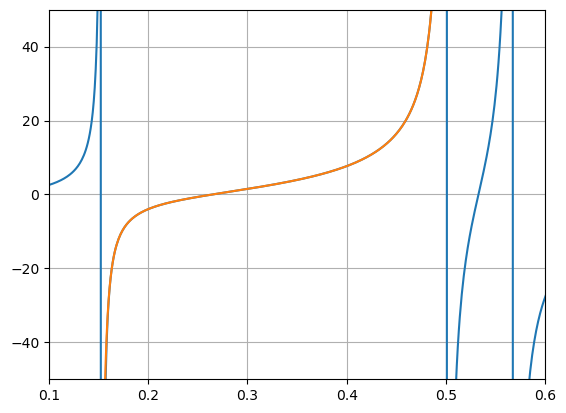

In [74]:
#plot taylor of x around the root_temp
x = np.linspace(0.001,1,1000)
plt.plot(q_2, z_d_results)
plt.plot(x, taylor(x))
plt.grid(True)
plt.ylim(-50,50)
plt.xlim(0.1,0.6)
#plot original function

plt.show()

In [88]:
import derivative_Kim
reload(derivative_Kim)


<module 'derivative_Kim' from '/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/derivative_Kim.py'>

In [92]:
mid = 0.32644368
k = 4.7
a = k-1.5
Xi_sq = 10**k
alpha = 10**(-a)
print(Xi_sq)

deriv = derivative_accelerated(mid, mid_value, Xi_sq,alpha, d)
print(deriv)

50118.72336272725
48.17269534039476


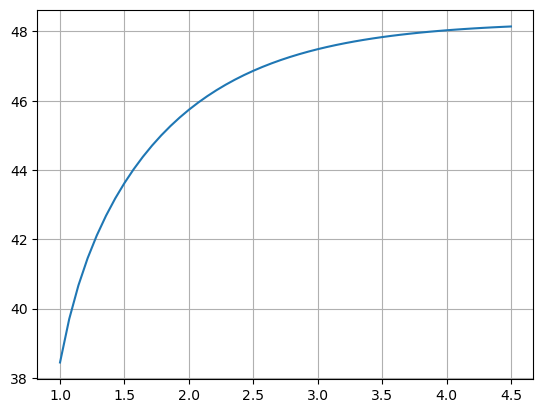

In [98]:
#plot deriv for varying k
k_1 = np.linspace(1,4.5,50)
deriv = [derivative_accelerated(mid, mid_value, 10**k_el,10**(-k_el+1.5), d) for k_el in k_1]
plt.plot(k_1, deriv)
plt.grid(True)
plt.show()


# Everything was wrong up to this point

In [101]:
import zeta
reload(zeta)

<module 'zeta' from '/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/zeta.py'>

In [116]:
mid = 0.32644368
k = 3
a = k-1.5
Xi_sq = 10**k
alpha = 10**(-a)
print(Xi_sq)
#graph zeta for q_2 in range 0 to 10

d = np.array([1,0,0])
q_2 = np.linspace(0.001,20,3000)
zeta_results = np.zeros(len(q_2))


for i in tqdm(range(len(q_2))):
    zeta_results[i] = zeta.zeta(q_2[i], Xi_sq, alpha, d)






1000


100%|██████████| 3000/3000 [00:28<00:00, 106.27it/s]


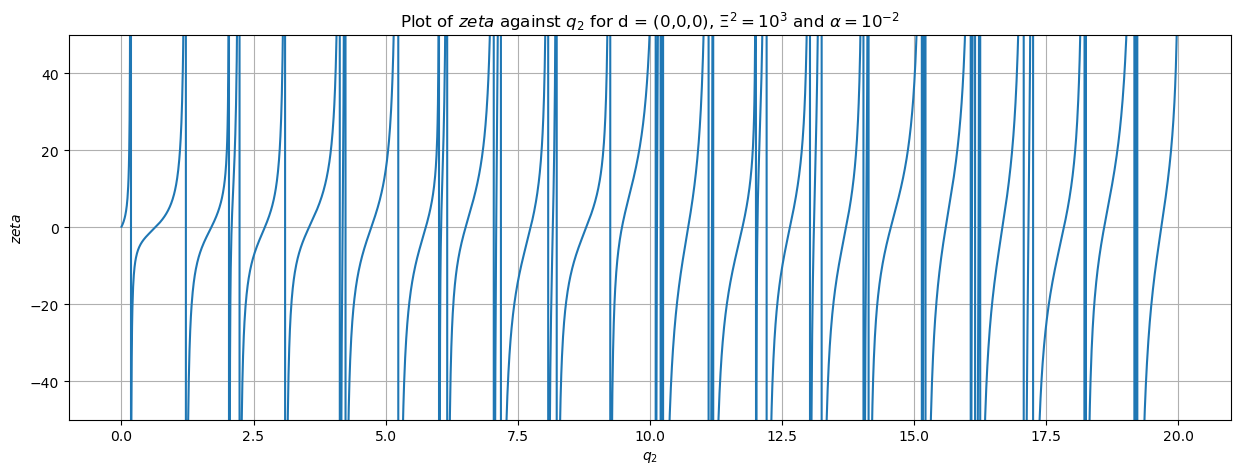

In [117]:
plt.figure(figsize=(15,5))
plt.plot(q_2, zeta_results)
plt.ylim(-50,50)
plt.grid(True)
#label the axes
plt.xlabel('$q_2$')
plt.ylabel('$zeta$')
plt.title('Plot of $zeta$ against $q_2$ for d = (0,0,0), $\Xi^2 = 10^3$ and $\\alpha = 10^{-2}$')

plt.show()
